# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yaml

# Call yaml

In [2]:
try:
    with open('../config.yaml', "r") as file:
        config = yaml.safe_load(file)
except Exception:
    print("Config file not found!!!")

# Call the files needed and display them, as well as their stats

In [3]:
bakery_data = pd.read_csv(config['data']['output']['bakery_data'])
tickets_total = pd.read_csv(config['data']['output']['tickets_total'])
bakery_data.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
display(bakery_data.head())

,ticket_number,date,time,article,quantity,unit_price,article_total
0,150040.0,2021-01-02,08:38,baguette,1.0,1.0,1.0
1,150040.0,2021-01-02,08:38,pain_au_chocolat,3.0,1.3,3.9
2,150041.0,2021-01-02,09:14,pain_au_chocolat,2.0,1.3,2.6
3,150041.0,2021-01-02,09:14,pain,1.0,1.3,1.3
4,150042.0,2021-01-02,09:25,traditional_baguette,5.0,1.3,6.5


In [5]:
round(bakery_data.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
ticket_number,208077.0,219268.35,40107.86,150040.0,184688.0,218572.0,254255.0,288913.0
quantity,208077.0,1.60,1.24,1.0,1.0,1.0,2.0,200.0
unit_price,208077.0,1.84,1.66,0.3,1.2,1.3,1.7,35.0
article_total,208077.0,2.73,2.63,0.3,1.3,2.0,2.7,200.0


In [6]:
bakery_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ticket_number,208077.0,219268.348558,40107.859269,150040.0,184688.0,218572.0,254255.0,288913.0
quantity,208077.0,1.604791,1.241241,1.0,1.0,1.0,2.0,200.0
unit_price,208077.0,1.838841,1.658061,0.3,1.2,1.3,1.7,35.0
article_total,208077.0,2.725791,2.626394,0.3,1.3,2.0,2.7,200.0


In [7]:
tickets_total

,ticket_number,total_ticket
0,150040.0,4.90
1,150041.0,3.90
2,150042.0,6.50
3,150043.0,5.60
4,150044.0,1.15
...,...,...
134881,288908.0,2.70
134882,288910.0,1.30
134883,288911.0,11.70
134884,288912.0,1.30


In [8]:
round(tickets_total.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
ticket_number,134886.0,219350.67,40131.84,150040.0,184570.25,219006.5,254260.75,288913.0
total_ticket,134886.0,4.20,4.45,0.3,1.30,2.6,5.20,247.1


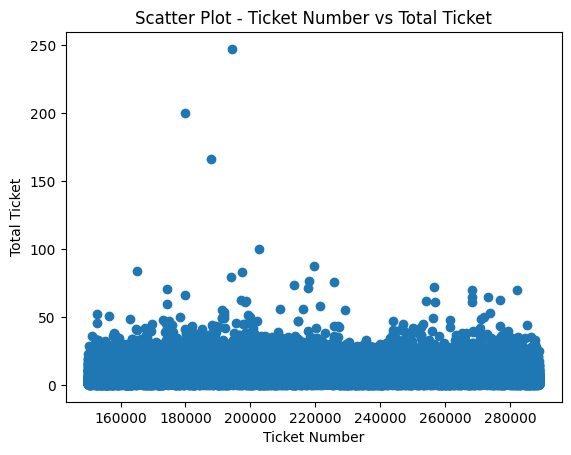

In [9]:
# Create scatter plot
plt.scatter(tickets_total['ticket_number'], tickets_total['total_ticket'])
plt.xlabel('Ticket Number')
plt.ylabel('Total Ticket')
plt.title('Scatter Plot - Ticket Number vs Total Ticket')


# Display the plot
plt.show()

# Analysis of tickets_total

In [10]:
# We have here about 135k transactions, with an average ticket of 4,20€. But a median of 2,60€, which indicates, that there are really hight values for
# tickets pulling up the average, as show by the max total_ticket being of 247,1€. As shown in the scatter plot, even considering that most of the 
# tickets are concentrated above the 50€ line, there are some higher, and they are pulling the average up. 
# The median will be the statistical measure used from now on on this study. 

# Finding the top and bottom 5 articles by quantity and revenue, and ploting them 

In [11]:
# Calculate the sum of quantities sold and total revenue for each article
article_data = bakery_data.groupby('article').agg({'quantity': 'sum', 'article_total': 'sum'}).reset_index()

# Sort the dataframe by quantity in descending order
sorted_articles = article_data.sort_values('quantity', ascending=False)

# Get the top 5 articles by quantity sold
top_5_articles = sorted_articles.head(5)

# Get the bottom 5 articles by quantity sold
bottom_5_articles = sorted_articles.tail(5)

print("Top 5 Articles by Quantity sold:")
display(top_5_articles[['article', 'quantity', 'article_total']])
print("Bottom 5 Articles by Quantity sold:")
display(bottom_5_articles[['article', 'quantity', 'article_total']])



Top 5 Articles by Quantity sold:


,article,quantity,article_total
115,traditional_baguette,118093.0,153520.9
29,croissant,29822.0,35786.4
73,pain_au_chocolat,25367.0,32977.1
5,banette,22870.0,26300.5
2,baguette,22156.0,22156.0


Bottom 5 Articles by Quantity sold:


,article,quantity,article_total
95,sachet_de_viennoiserie,1.0,4.0
117,trois_chocolat,1.0,3.0
36,douceur_d_hiver,1.0,3.0
20,cake,1.0,3.0
79,pain_noir,1.0,0.6


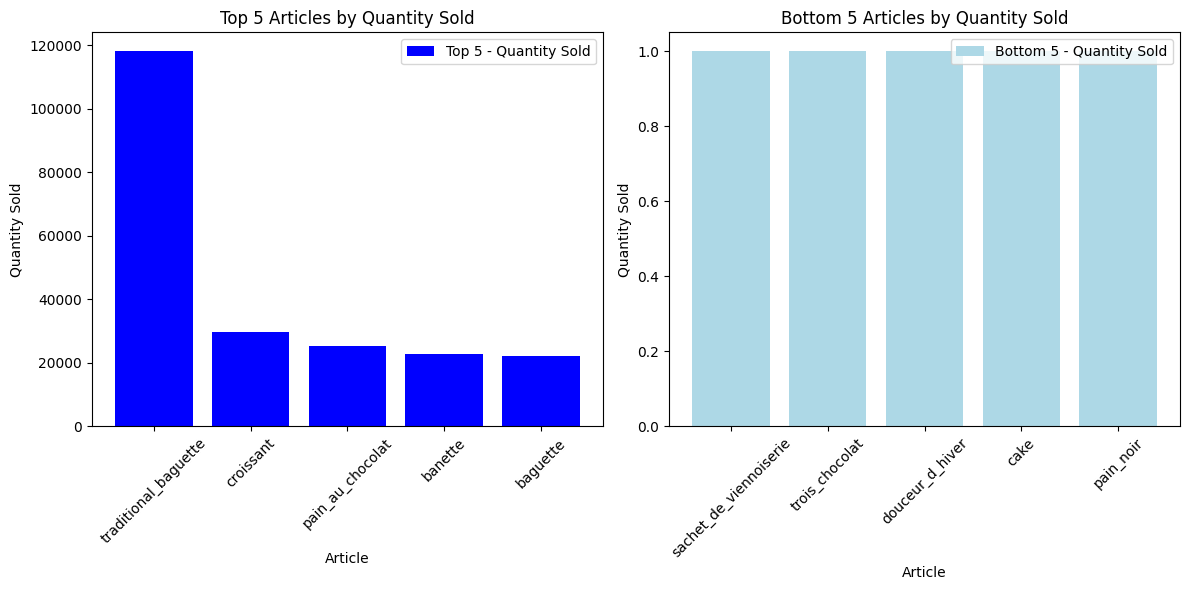

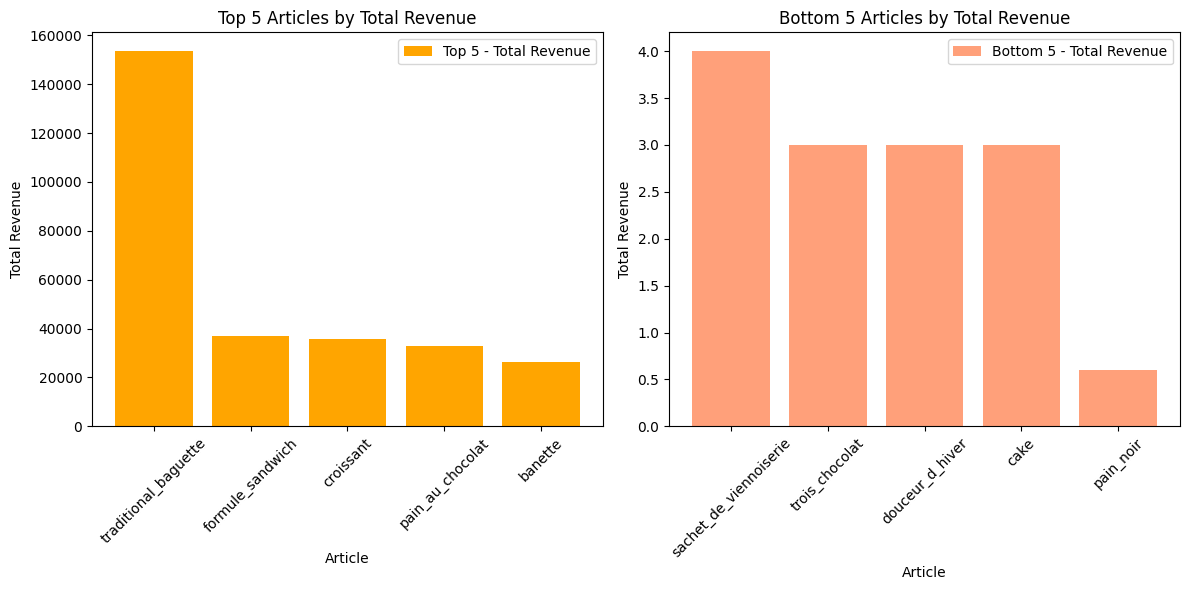

In [12]:
# Sort the dataframe by total revenue in descending order
sorted_articles_revenue = article_data.sort_values('article_total', ascending=False)

# Get the top 5 and bottom 5 articles by total revenue
top_5_articles_revenue = sorted_articles_revenue.head(5)
bottom_5_articles_revenue = sorted_articles_revenue.tail(5)

# Plotting the bar chart for quantities sold
plt.figure(figsize=(12, 6))

# Top 5 articles by quantity sold
plt.subplot(1, 2, 1)
plt.bar(top_5_articles['article'], top_5_articles['quantity'], color='blue', label='Top 5 - Quantity Sold')
plt.xlabel('Article')
plt.ylabel('Quantity Sold')
plt.title('Top 5 Articles by Quantity Sold')
plt.xticks(rotation=45)
plt.legend()


# Bottom 5 articles by quantity sold
plt.subplot(1, 2, 2)
plt.bar(bottom_5_articles['article'], bottom_5_articles['quantity'], color='lightblue', label='Bottom 5 - Quantity Sold')
plt.xlabel('Article')
plt.ylabel('Quantity Sold')
plt.title('Bottom 5 Articles by Quantity Sold')
plt.xticks(rotation=45)
plt.legend()


plt.tight_layout()
plt.show()

# Plotting the bar chart for total revenue
plt.figure(figsize=(12, 6))

# Top 5 articles by total revenue
plt.subplot(1, 2, 1)
plt.bar(top_5_articles_revenue['article'], top_5_articles_revenue['article_total'], color='orange', label='Top 5 - Total Revenue')
plt.xlabel('Article')
plt.ylabel('Total Revenue')
plt.title('Top 5 Articles by Total Revenue')
plt.xticks(rotation=45)
plt.legend()


# Bottom 5 articles by total revenue
plt.subplot(1, 2, 2)
plt.bar(bottom_5_articles_revenue['article'], bottom_5_articles_revenue['article_total'], color='lightsalmon', label='Bottom 5 - Total Revenue')
plt.xlabel('Article')
plt.ylabel('Total Revenue')
plt.title('Bottom 5 Articles by Total Revenue')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

# Analysis of Top and Bottom 5 Articles by Quantity and Revenue

In [13]:
# The most sold item by far is the traditional baguette. Then the revenue vs quantity finds some differences as the second 
# to generate more revenue isn't the same as the seconde one to sell more in quantity: formule_sandwich vs croissant. In quantity the formule_sandwich
# isn't even in the top 5, which indicates that its price way higher than the 2nd to 5th more sold in quantity. 
# As for the Bottom 5 in quantity and revenue, they are the same. And seeing as they are just one unit sold, they are probably errors in checkout. 

# Creating 'hour' column for median by hour purposes

In [14]:
# Convert 'time' column to datetime format
bakery_data['time'] = pd.to_datetime(bakery_data['time'])

# Extract the hour from the 'time' column and create a new 'hour' column
bakery_data['hour'] = bakery_data['time'].dt.hour

display(bakery_data)

C:\Users\duart\AppData\Local\Temp\ipykernel_12876\702359857.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  bakery_data['time'] = pd.to_datetime(bakery_data['time'])


,ticket_number,date,time,article,quantity,unit_price,article_total,hour
0,150040.0,2021-01-02,2023-07-13 08:38:00,baguette,1.0,1.0,1.0,8
1,150040.0,2021-01-02,2023-07-13 08:38:00,pain_au_chocolat,3.0,1.3,3.9,8
2,150041.0,2021-01-02,2023-07-13 09:14:00,pain_au_chocolat,2.0,1.3,2.6,9
3,150041.0,2021-01-02,2023-07-13 09:14:00,pain,1.0,1.3,1.3,9
4,150042.0,2021-01-02,2023-07-13 09:25:00,traditional_baguette,5.0,1.3,6.5,9
...,...,...,...,...,...,...,...,...
208072,288911.0,2022-09-30,2023-07-13 18:52:00,campagne,2.0,2.0,4.0,18
208073,288911.0,2022-09-30,2023-07-13 18:52:00,traditional_baguette,5.0,1.3,6.5,18
208074,288911.0,2022-09-30,2023-07-13 18:52:00,boule_200g,1.0,1.2,1.2,18
208075,288912.0,2022-09-30,2023-07-13 18:55:00,traditional_baguette,1.0,1.3,1.3,18


# Finding the top and bottom 3 hours of movement using median and ploting them 

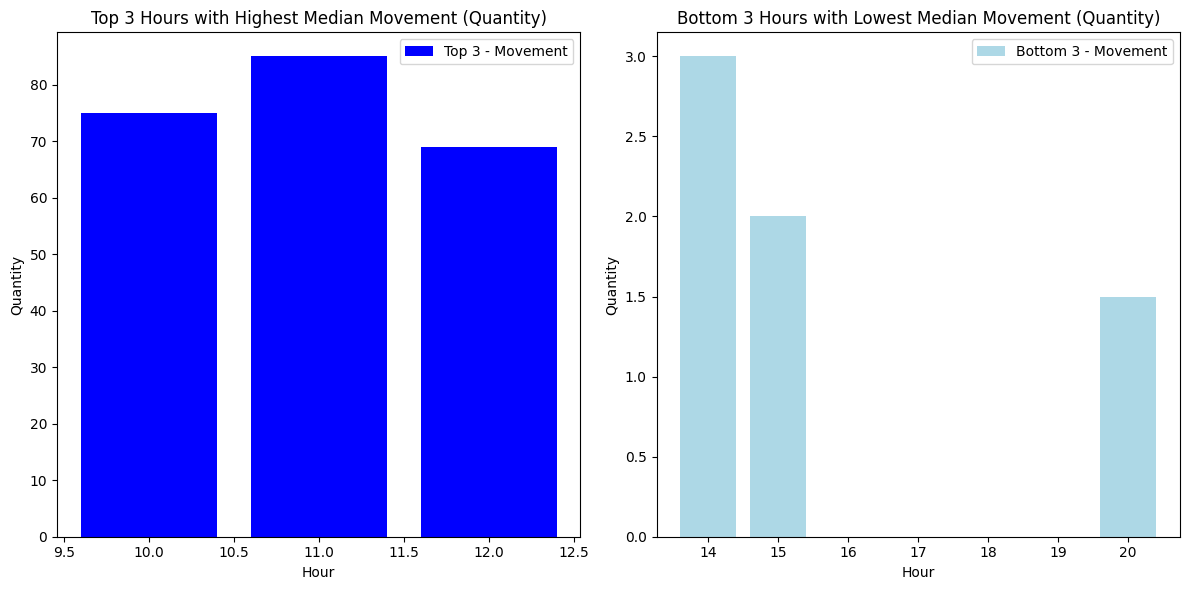

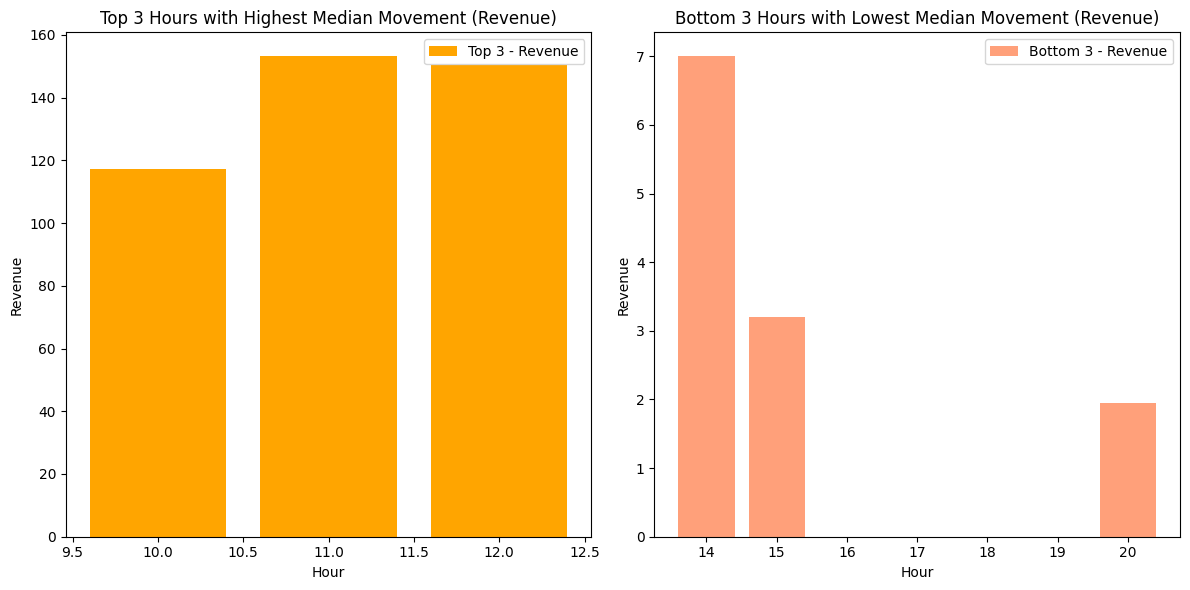

In [15]:
# Calculate the median movement and median revenue by day for each hour
hourly_median_movement = bakery_data.groupby(['date', 'hour'])['quantity'].sum().reset_index().groupby('hour')['quantity'].median().reset_index()
hourly_median_revenue = bakery_data.groupby(['date', 'hour'])['article_total'].sum().reset_index().groupby('hour')['article_total'].median().reset_index()

# Sort the dataframe by median movement in descending order
sorted_hourly_median_movement = hourly_median_movement.sort_values('quantity', ascending=False)

# Get the top 3 hours with the highest median movement
top_3_hours_movement = sorted_hourly_median_movement.head(3)

# Get the bottom 3 hours with the lowest median movement
bottom_3_hours_movement = sorted_hourly_median_movement.tail(3)

# Merge the median revenue into the top and bottom hours dataframes based on the hour
top_3_hours_movement_revenue = pd.merge(top_3_hours_movement, hourly_median_revenue, on='hour')
bottom_3_hours_movement_revenue = pd.merge(bottom_3_hours_movement, hourly_median_revenue, on='hour')

# Plotting the top and bottom 3 hours side by side based on quantity
plt.figure(figsize=(12, 6))

# Top 3 hours by movement (quantity)
plt.subplot(1, 2, 1)
plt.bar(top_3_hours_movement['hour'], top_3_hours_movement['quantity'], color='blue', label='Top 3 - Movement')
plt.xlabel('Hour')
plt.ylabel('Quantity')
plt.title('Top 3 Hours with Highest Median Movement (Quantity)')
plt.legend()

# Bottom 3 hours by movement (quantity)
plt.subplot(1, 2, 2)
plt.bar(bottom_3_hours_movement['hour'], bottom_3_hours_movement['quantity'], color='lightblue', label='Bottom 3 - Movement')
plt.xlabel('Hour')
plt.ylabel('Quantity')
plt.title('Bottom 3 Hours with Lowest Median Movement (Quantity)')
plt.legend()

plt.tight_layout()
plt.show()

# Plotting the top and bottom 3 hours side by side based on revenue
plt.figure(figsize=(12, 6))

# Top 3 hours by revenue
plt.subplot(1, 2, 1)
plt.bar(top_3_hours_movement_revenue['hour'], top_3_hours_movement_revenue['article_total'], color='orange', label='Top 3 - Revenue')
plt.xlabel('Hour')
plt.ylabel('Revenue')
plt.title('Top 3 Hours with Highest Median Movement (Revenue)')
plt.legend()

# Bottom 3 hours by revenue
plt.subplot(1, 2, 2)
plt.bar(bottom_3_hours_movement_revenue['hour'], bottom_3_hours_movement_revenue['article_total'], color='lightsalmon', label='Bottom 3 - Revenue')
plt.xlabel('Hour')
plt.ylabel('Revenue')
plt.title('Bottom 3 Hours with Lowest Median Movement (Revenue)')
plt.legend()

plt.tight_layout()
plt.show()



# Analysis of Top and Bottom 3 hours of movement by Quantity and Revenue

In [16]:
# In the Top 3 hours of revenue and quantity we already see that, probably at 12.00 the medium_ticket will be higher than at 10.00, since its quantity 
# is lower than at 10.00, and the revenue at 12.00 almost equals the one of 11.00, that in quantity is way above the other two hours. 
# As for the Bottom 3 hours both the revenue and the quantity have the same results. Comparing with the top 3 hours, they are hours with very little 
# business. Indicated for cleaning and production for more hours with more movement. 

# Finding the median quantity sold by weekday vs weekends and the revenue generated by weekday vs weekends

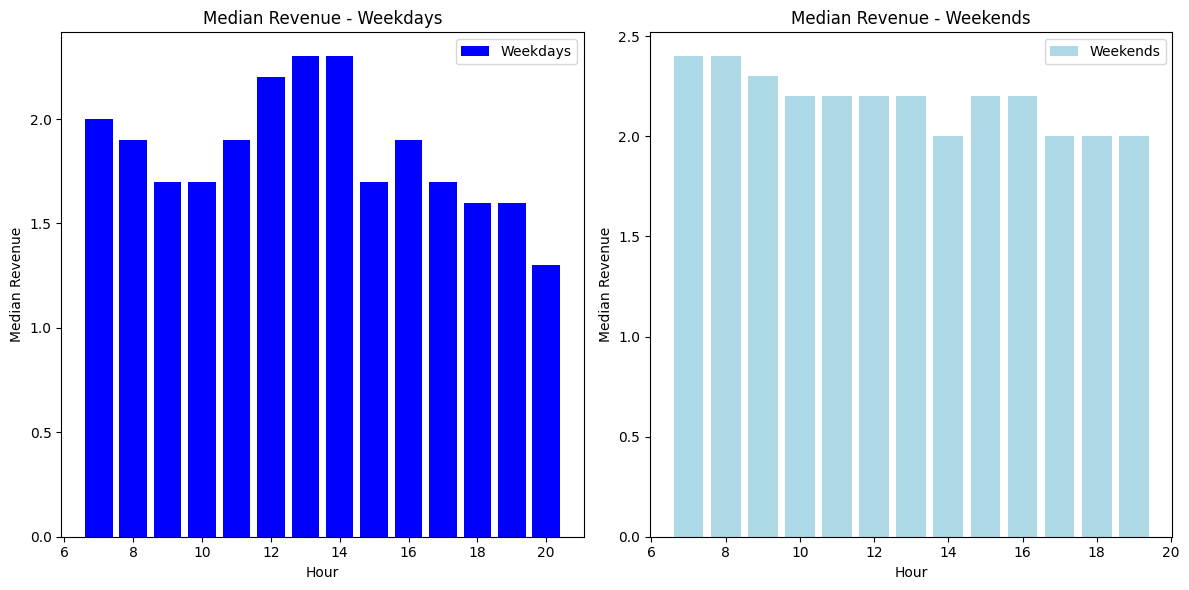

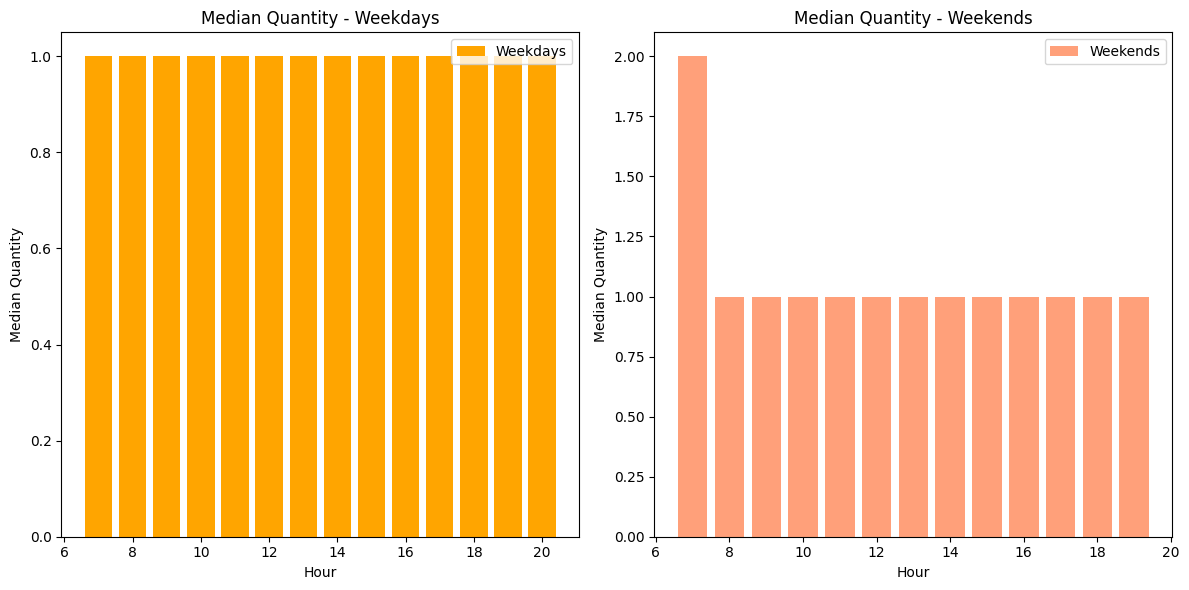

In [17]:
# Convert 'date' column to datetime format
bakery_data['date'] = pd.to_datetime(bakery_data['date'])

# Extract the weekday from the 'date' column and create a new 'day_of_week' column
bakery_data['day_of_week'] = bakery_data['date'].dt.day_name()

# Calculate the median quantity and revenue for weekdays and weekends
weekday_median = bakery_data[bakery_data['day_of_week'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])].groupby('hour')[['quantity', 'article_total']].median().reset_index()
weekend_median = bakery_data[bakery_data['day_of_week'].isin(['Saturday', 'Sunday'])].groupby('hour')[['quantity', 'article_total']].median().reset_index()

# Plotting the comparison of revenue for weekdays and weekends
plt.figure(figsize=(12, 6))

# Weekday Revenue
plt.subplot(1, 2, 1)
plt.bar(weekday_median['hour'], weekday_median['article_total'], color='blue', label='Weekdays')
plt.xlabel('Hour')
plt.ylabel('Median Revenue')
plt.title('Median Revenue - Weekdays')
plt.legend()

# Weekend Revenue
plt.subplot(1, 2, 2)
plt.bar(weekend_median['hour'], weekend_median['article_total'], color='lightblue', label='Weekends')
plt.xlabel('Hour')
plt.ylabel('Median Revenue')
plt.title('Median Revenue - Weekends')
plt.legend()

plt.tight_layout()
plt.show()

# Plotting the comparison of quantities for weekdays and weekends
plt.figure(figsize=(12, 6))

# Weekday Quantity
plt.subplot(1, 2, 1)
plt.bar(weekday_median['hour'], weekday_median['quantity'], color='orange', label='Weekdays')
plt.xlabel('Hour')
plt.ylabel('Median Quantity')
plt.title('Median Quantity - Weekdays')
plt.legend()

# Weekend Quantity
plt.subplot(1, 2, 2)
plt.bar(weekend_median['hour'], weekend_median['quantity'], color='lightsalmon', label='Weekends')
plt.xlabel('Hour')
plt.ylabel('Median Quantity')
plt.title('Median Quantity - Weekends')
plt.legend()

plt.tight_layout()
plt.show()


# Analysis of Weekdays vs Weekends Quantities sold and Revenue generated in median by Hour

In [18]:
# The median quantity is usually the same by hour, either in weekdays or in weekends, with exception of the first hour of the weekends, where in
# quantity, they sell the double. The real difference is in the revenue generated, because exception made in the first hour of the weekends, they sell 
# the same quantities, but the revenue generated by hour is higher, indicating higher tickets and prices by article on the weekends. 